AI ECHO- SentimentAnalysis

Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\BaBuReDdI\Downloads\chatgpt_style_reviews_dataset.xlsx - Sheet1 (3).csv")

In [4]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,########,Review title 1,"Not satisfied, many bugs and issues.",1,user1,80,6,Amazon,zh,Kenya,2.1.4,No
1,########,Review title 2,Amazing quality and user-friendly interface.,5,user2,180,5,Flipkart,zh,France,1.2.3,No
2,########,Review title 3,"Terrible experience, needs major improvements.",2,user3,154,5,Flipkart,pt,USA,1.2.3,No
3,########,Review title 4,Poor performance and not user-friendly.,1,user4,96,5,Amazon,es,Qatar,2.1.4,Yes
4,########,Review title 5,"Not satisfied, many bugs and issues.",2,user5,139,6,Website,ar,Kenya,2.1.4,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               500 non-null    object
 1   title              500 non-null    object
 2   review             500 non-null    object
 3   rating             500 non-null    int64 
 4   username           500 non-null    object
 5   helpful_votes      500 non-null    int64 
 6   review_length      500 non-null    int64 
 7   platform           500 non-null    object
 8   language           500 non-null    object
 9   location           500 non-null    object
 10  version            500 non-null    object
 11  verified_purchase  500 non-null    object
dtypes: int64(3), object(9)
memory usage: 47.0+ KB


In [6]:
df.shape

(500, 12)

In [7]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

Create Sentiment Labels

In [8]:
def label_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

In [9]:
df["sentiment"] = df["rating"].apply(label_sentiment)

In [10]:
df["sentiment"].value_counts()

sentiment
Positive    200
Negative    195
Neutral     105
Name: count, dtype: int64

Import NLP Tools

In [11]:
import re

In [12]:
import string

In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BaBuReDdI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BaBuReDdI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text Cleaning

In [18]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [19]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [20]:
df["clean_review"] = df["review"].apply(clean_text)

EXPLORATORY DATA ANALYSIS (EDA)

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

Sentiment Distribution

Text(0.5, 1.0, 'Rating Distribution')

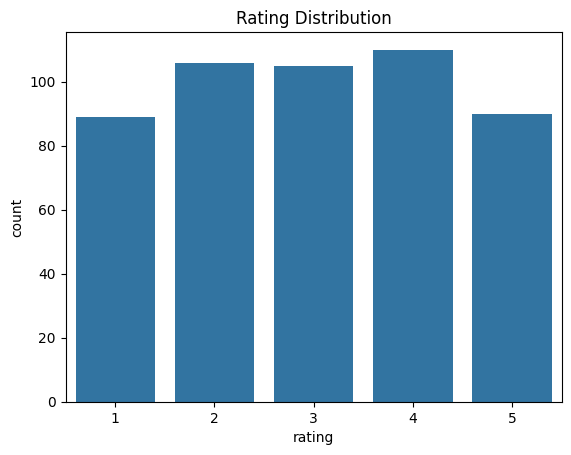

In [23]:
sns.countplot(data=df, x="rating")
plt.title("Rating Distribution")

Platform vs Average Rating

Text(0.5, 1.0, 'Average Rating by Platform')

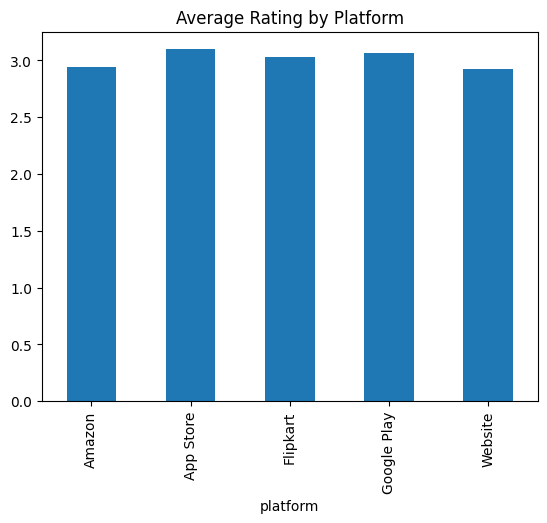

In [24]:
df.groupby("platform")["rating"].mean().plot(kind="bar")
plt.title("Average Rating by Platform")

Verified vs Non-Verified

Text(0.5, 1.0, 'Verified vs Non-Verified Average Rating')

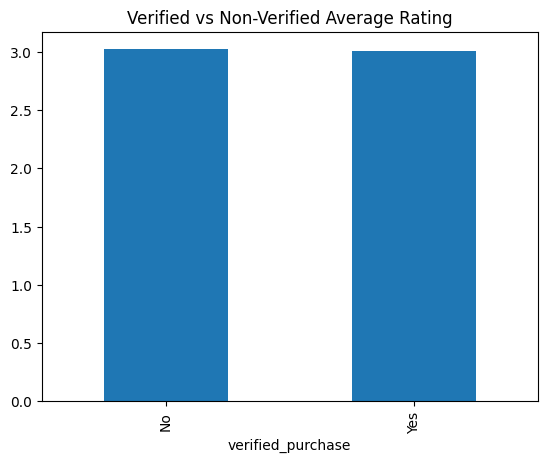

In [25]:
df.groupby("verified_purchase")["rating"].mean().plot(kind="bar")
plt.title("Verified vs Non-Verified Average Rating")

Review Length Analysis

In [26]:
df["review_length"] = df["clean_review"].apply(len)

Text(0.5, 1.0, 'Review Length by Sentiment')

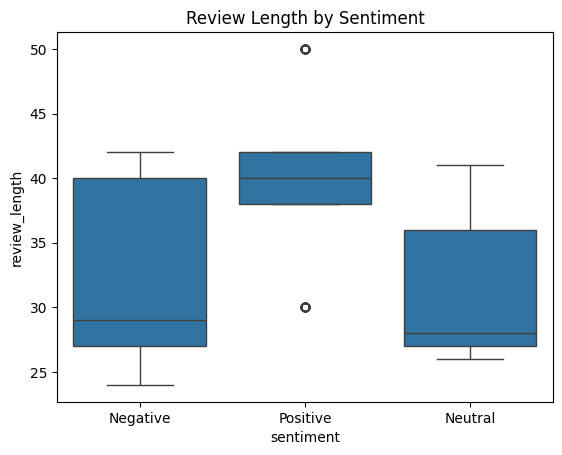

In [27]:
sns.boxplot(data=df, x="sentiment", y="review_length")
plt.title("Review Length by Sentiment")

WordCloud (Positive)

In [28]:
from wordcloud import WordCloud

In [29]:
positive_text = " ".join(df[df["sentiment"]=="Positive"]["clean_review"])

Text(0.5, 1.0, 'Positive Reviews WordCloud')

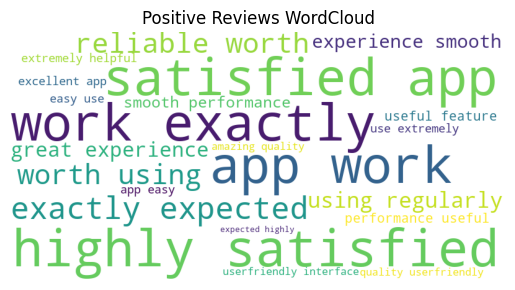

In [30]:
wc = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Positive Reviews WordCloud")

WordCloud (Negative)

In [31]:
negative_text = " ".join(df[df["sentiment"]=="Negative"]["clean_review"])

Text(0.5, 1.0, 'Negative Reviews WordCloud')

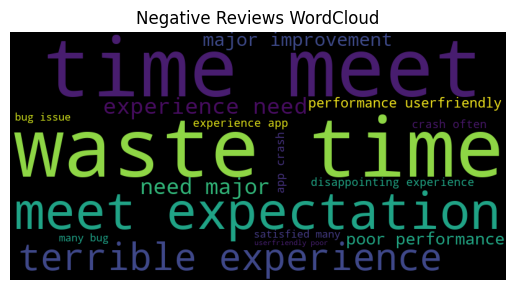

In [32]:
wc = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Negative Reviews WordCloud")

Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df["clean_review"]
y = df["sentiment"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature Selection(TF-IDF)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [38]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {"C":[0.1,1,10]}

In [42]:
grid_log = GridSearchCV(LogisticRegression(max_iter=1000),
                        param_grid,
                        cv=5)

In [43]:
grid_log.fit(X_train_tfidf, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=1000)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter in

In [44]:
best_log = grid_log.best_estimator_

In [45]:
log_pred = best_log.predict(X_test_tfidf)

Logistic Evaluation

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
print("Logistic Accuracy:", accuracy_score(y_test, log_pred))

Logistic Accuracy: 1.0


In [48]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        39
     Neutral       1.00      1.00      1.00        21
    Positive       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Text(0.5, 1.0, 'Logistic Confusion Matrix')

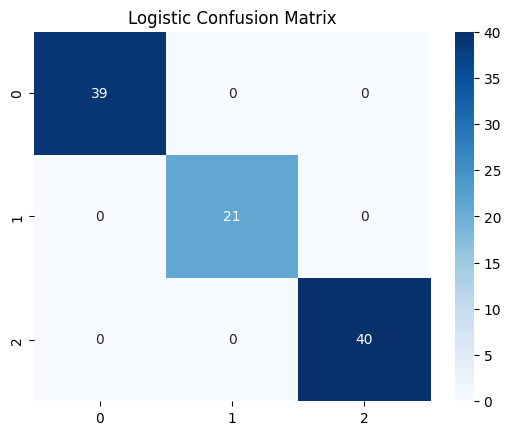

In [49]:
sns.heatmap(confusion_matrix(y_test, log_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Confusion Matrix")

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier(n_estimators=300)

In [52]:
rf_model.fit(X_train_tfidf, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [53]:
rf_pred = rf_model.predict(X_test_tfidf)

In [54]:
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

RF Accuracy: 1.0


In [55]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        39
     Neutral       1.00      1.00      1.00        21
    Positive       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
nb_model = MultinomialNB()

In [58]:
nb_model.fit(X_train_tfidf, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [59]:
nb_pred = nb_model.predict(X_test_tfidf)

In [60]:
print("NB Accuracy:", accuracy_score(y_test, nb_pred))

NB Accuracy: 1.0


In [61]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        39
     Neutral       1.00      1.00      1.00        21
    Positive       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



SVM

In [62]:
from sklearn.svm import LinearSVC

In [63]:
svm_model = LinearSVC()

In [64]:
svm_model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [65]:
svm_pred = svm_model.predict(X_test_tfidf)

In [66]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 1.0


In [67]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        39
     Neutral       1.00      1.00      1.00        21
    Positive       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



LSTM (DEEP LEARNING)

Tokenization

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [69]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [70]:
max_words = 10000
max_len = 200

In [71]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [72]:
X_train_pad = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

Label Encoder

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

Build LSTM

In [75]:
from tensorflow.keras.models import Sequential

In [76]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [77]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128, input_length=max_len))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation='softmax'))

d:\vscode\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [78]:

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

Train LSTM

In [79]:
model_lstm.fit(X_train_pad, y_train_enc,
               epochs=5,
               batch_size=32,
               validation_data=(X_test_pad, y_test_enc))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.5525 - loss: 1.0470 - val_accuracy: 0.7900 - val_loss: 0.9594
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7875 - loss: 0.8762 - val_accuracy: 0.7900 - val_loss: 0.7291
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.8100 - loss: 0.5478 - val_accuracy: 0.9400 - val_loss: 0.3429
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9775 - loss: 0.2220 - val_accuracy: 1.0000 - val_loss: 0.0958
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 1.0000 - loss: 0.0499 - val_accuracy: 1.0000 - val_loss: 0.0118


Evaluate LSTM

In [80]:
loss, acc = model_lstm.evaluate(X_test_pad, y_test_enc)
print("LSTM Accuracy:", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0118
LSTM Accuracy: 1.0


FINAL PREDICTION

In [81]:
def predict_review(text):
    text = clean_text(text)
    vector = tfidf.transform([text])
    return best_log.predict(vector)[0]

In [82]:
predict_review("This app is extremely helpful and amazing")

'Positive'

ML Prediction Function

In [83]:
def predict_ml(text):
    # Clean the text
    text = clean_text(text)
    
    # Convert to TF-IDF
    vector = tfidf.transform([text])
    
    # Predict
    prediction = best_log.predict(vector)[0]
    
    return prediction


In [84]:
print(predict_ml("This app is amazing and very useful"))

Positive


In [85]:
print(predict_ml("This is average and okay"))

Neutral


In [86]:
print(predict_ml("Very bad experience and waste of time"))

Negative


Save Model

In [87]:
import joblib

joblib.dump(best_log, "logistic_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(nb_model, "nb_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

model_lstm.save("lstm_model.h5")